# (U.S.A Flights)
## by : Abdelrhman Hussam

## Introduction

> This data contains flights for a period starting from the first four months of the year, accompanied by many features that need to be analyzed in order to answer the questions raised to be answered accurately, and there are also some ideas that we want to try to find an explanation for through this analysis.

## Questions

1. What percentage of flights canceled and diverted ?

2. Which month is the most canceled flights ?

3. Which month is the most diverted flights ?

4. What are the most successful airports for flights?

5. What are the cities that receive the most successful flights?

6. What are the most successful flights in terms of distance ?

7. What are the most diverted flights in terms of distance ?

In [102]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [103]:
data_2008 = pd.read_csv('2008.csv')
airports = pd.read_csv('airports.csv')
airlines = pd.read_csv('carriers.csv')

In [104]:
data_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [105]:
data_2008.shape

(2389217, 29)

In [106]:
data_2008.nunique()

Year                    1
Month                   4
DayofMonth             31
DayOfWeek               7
DepTime              1434
CRSDepTime           1158
ArrTime              1440
CRSArrTime           1331
UniqueCarrier          20
FlightNum            7269
TailNum              5031
ActualElapsedTime     668
CRSElapsedTime        476
AirTime               648
ArrDelay              935
DepDelay              921
Origin                291
Dest                  293
Distance             1377
TaxiIn                165
TaxiOut               277
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay          781
WeatherDelay          481
NASDelay              483
SecurityDelay         109
LateAircraftDelay     474
dtype: int64

In [107]:
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [108]:
airlines.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


Now let's print all dataset columns name

In [109]:
col = list(data_2008.columns.values)
for i in range(len(col)):
    print(i,col[i])

0 Year
1 Month
2 DayofMonth
3 DayOfWeek
4 DepTime
5 CRSDepTime
6 ArrTime
7 CRSArrTime
8 UniqueCarrier
9 FlightNum
10 TailNum
11 ActualElapsedTime
12 CRSElapsedTime
13 AirTime
14 ArrDelay
15 DepDelay
16 Origin
17 Dest
18 Distance
19 TaxiIn
20 TaxiOut
21 Cancelled
22 CancellationCode
23 Diverted
24 CarrierDelay
25 WeatherDelay
26 NASDelay
27 SecurityDelay
28 LateAircraftDelay


In [110]:
data_2008.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2389217.0,2.389217e+06,2.389217e+06,2.389217e+06,2.324775e+06,2.389217e+06,2.319121e+06,2.389217e+06,2.389217e+06,2.319121e+06,...,2.389217e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.389217e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000
mean,2008.0,2.505009e+00,1.566386e+01,3.909625e+00,1.340018e+03,1.329992e+03,1.485835e+03,1.496744e+03,2.213888e+03,1.286189e+02,...,7.261589e+02,6.839862e+00,1.668584e+01,2.697202e-02,2.366466e-03,15.752957,2.938243,16.158462,0.080459,20.976710
std,0.0,1.121493e+00,8.750405e+00,1.980431e+00,4.802717e+02,4.657833e+02,5.081295e+02,4.845238e+02,1.951392e+03,7.025303e+01,...,5.571763e+02,4.846435e+00,1.102905e+01,1.620017e-01,4.858875e-02,40.035487,19.166662,30.534167,1.742579,38.617154
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,...,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.270000e+02,1.110000e+03,1.115000e+03,6.050000e+02,7.800000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,3.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.325000e+03,1.516000e+03,1.520000e+03,1.544000e+03,1.110000e+02,...,5.830000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,4.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,3.631000e+03,1.600000e+02,...,9.570000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,4.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,9.050000e+02,...,4.962000e+03,2.130000e+02,3.830000e+02,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000


In [111]:
# I will take a some feature to work 
data = data_2008[['Month','DayofMonth','Origin','Dest','Distance','Cancelled','DepTime','AirTime','Diverted','DepDelay','ArrDelay','ActualElapsedTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','UniqueCarrier']]

In [112]:
data.head()

,Month,DayofMonth,Origin,Dest,Distance,Cancelled,DepTime,AirTime,Diverted,DepDelay,ArrDelay,ActualElapsedTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier
0,1,3,HOU,LIT,393,0,1343.0,55.0,0,18.0,16.0,68.0,16.0,0.0,0.0,0.0,0.0,WN
1,1,3,HOU,MAF,441,0,1125.0,71.0,0,5.0,2.0,82.0,NaN,NaN,NaN,NaN,NaN,WN
2,1,3,HOU,MAF,441,0,2009.0,71.0,0,-6.0,-4.0,87.0,NaN,NaN,NaN,NaN,NaN,WN
3,1,3,HOU,MCO,848,0,903.0,108.0,0,8.0,-2.0,120.0,NaN,NaN,NaN,NaN,NaN,WN
4,1,3,HOU,MCO,848,0,1423.0,107.0,0,23.0,16.0,123.0,16.0,0.0,0.0,0.0,0.0,WN


In [113]:
#data.info

In [114]:
# Merge two datasets airport and data_2008 according to the airport name 
data = pd.merge(data, airports, left_on='Origin', right_on='iata')

### What is the structure of your dataset?

2389217 flights in 2008 
the number of flight is given with 29 feature

### What is/are the main feature(s) of interest in your dataset?

Month , DayofMonth , Origin , Dest , Distance , city ,Cancelled , Diverted

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

ArrDelay , DepDelay , ActualElapsedTime


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### First, I will divide the data into three segments, canceled flights, successful flights and diverted flights

In [115]:
flight_cancel  = data[data['Cancelled'] == 1]

In [116]:
flights = data[data['Cancelled'] == 0]

In [117]:
flight_diverted = flights[flights['Diverted'] == 1]

The next step is to find out the percentage of both canceled and diverted flights

> 1. What percentage of flights canceled and diverted ?

#### Answer : 2.7% canceled and 0.24 diverted

Text(0.5, 0, 'Diverted')

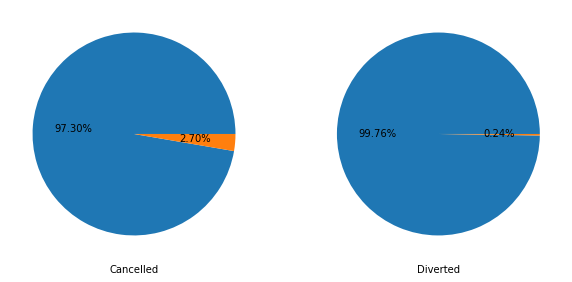

In [118]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.pie(data.Cancelled.value_counts(), autopct='%.2f%%');
plt.xlabel('Cancelled')

plt.subplot(1,2,2)
plt.pie(flights.Diverted.value_counts(), autopct='%.2f%%');
plt.xlabel('Diverted')

In [119]:
# This function plot the feature with it's frequancy in bar chart 
# under three condition are shown below

def plot_data_with_freq(x,y):
    plt.xlabel(x)
    plt.ylabel('Frequacny')
    
    if y == 'canceled':
        flight_cancel[x].value_counts()[:10].plot.bar(label=x,color='red')
    if y == 'diverted':
        flight_diverted[x].value_counts()[:10].plot.bar(label=x,color='blue')
    if y == None:
        flights[x].value_counts()[:10].plot.bar(label=x,color='green')
    plt.title("Distribution of {} with it's count".format(x))
    plt.legend()
    plt.grid(True)

## Canceled Flights

Now I will work on the canceled flights and their relationship to the distance and cities and airports heading to. In addition to the number of canceled flights every month.

In [120]:
flight_cancel.head()

,Month,DayofMonth,Origin,Dest,Distance,Cancelled,DepTime,AirTime,Diverted,DepDelay,...,SecurityDelay,LateAircraftDelay,UniqueCarrier,iata,airport,city,state,country,lat,long
42,1,3,HOU,SAT,192,1,NaN,NaN,0,NaN,...,NaN,NaN,WN,HOU,William P Hobby,Houston,TX,USA,29.645419,-95.278889
97,1,4,HOU,DAL,239,1,NaN,NaN,0,NaN,...,NaN,NaN,WN,HOU,William P Hobby,Houston,TX,USA,29.645419,-95.278889
304,1,5,HOU,SAT,192,1,NaN,NaN,0,NaN,...,NaN,NaN,WN,HOU,William P Hobby,Houston,TX,USA,29.645419,-95.278889
490,1,7,HOU,DAL,239,1,NaN,NaN,0,NaN,...,NaN,NaN,WN,HOU,William P Hobby,Houston,TX,USA,29.645419,-95.278889
585,1,7,HOU,SAT,192,1,NaN,NaN,0,NaN,...,NaN,NaN,WN,HOU,William P Hobby,Houston,TX,USA,29.645419,-95.278889


In [121]:
flight_cancel.shape

(64442, 25)

we can see that, there are only 64442 cancel flight in all dataset

In [122]:
#some important information 
flight_cancel.nunique()

Month                   4
DayofMonth             31
Origin                286
Dest                  284
Distance             1177
Cancelled               1
DepTime                 0
AirTime                 0
Diverted                1
DepDelay                0
ArrDelay                0
ActualElapsedTime       0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
UniqueCarrier          20
iata                  286
airport               286
city                  271
state                  51
country                 1
lat                   286
long                  286
dtype: int64

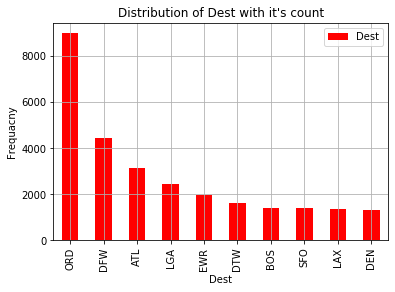

In [123]:
plot_data_with_freq('Dest','canceled')

> 2.Which month is the most canceled flights ?

#### Answer : 2

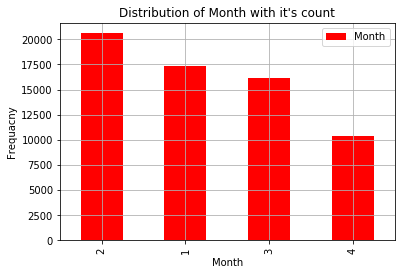

In [124]:
plot_data_with_freq('Month','canceled')

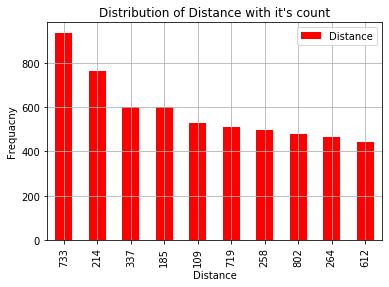

In [125]:
plot_data_with_freq('Distance','canceled')

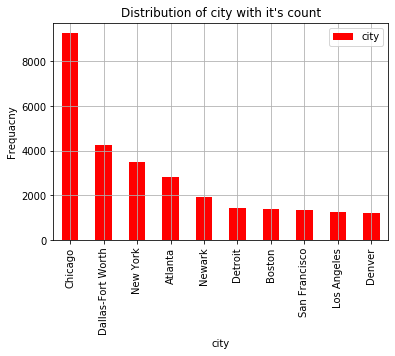

In [126]:
plot_data_with_freq('city','canceled')

From the above, we can conclude the following.

> Most of the canceled flights would have traveled 733 miles.

> Most of the canceled flights were in Chicago, then Dallas-fort worth, the difference in the number of flights between the two cities is very large, about 4,500 flights.

> The most canceled flights were during January, increased in February, and then decreased in March and April.
It is possible that the reason for this cancellation is the weather conditions, especially since January and February are winter months 

## Successful Flights

With the same plans that we made on canceled flights, we will apply them to successful and dirvert flights.

In [127]:
flights.head()

,Month,DayofMonth,Origin,Dest,Distance,Cancelled,DepTime,AirTime,Diverted,DepDelay,...,SecurityDelay,LateAircraftDelay,UniqueCarrier,iata,airport,city,state,country,lat,long
0,1,3,HOU,LIT,393,0,1343.0,55.0,0,18.0,...,0.0,0.0,WN,HOU,William P Hobby,Houston,TX,USA,29.645419,-95.278889
1,1,3,HOU,MAF,441,0,1125.0,71.0,0,5.0,...,NaN,NaN,WN,HOU,William P Hobby,Houston,TX,USA,29.645419,-95.278889
2,1,3,HOU,MAF,441,0,2009.0,71.0,0,-6.0,...,NaN,NaN,WN,HOU,William P Hobby,Houston,TX,USA,29.645419,-95.278889
3,1,3,HOU,MCO,848,0,903.0,108.0,0,8.0,...,NaN,NaN,WN,HOU,William P Hobby,Houston,TX,USA,29.645419,-95.278889
4,1,3,HOU,MCO,848,0,1423.0,107.0,0,23.0,...,0.0,0.0,WN,HOU,William P Hobby,Houston,TX,USA,29.645419,-95.278889


In [128]:
flights.shape

(2324775, 25)

we can see that, there are only 2324775 successful flight in all dataset

In [129]:
flights.describe()

,Month,DayofMonth,Distance,Cancelled,DepTime,AirTime,Diverted,DepDelay,ArrDelay,ActualElapsedTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,lat,long
count,2.324775e+06,2.324775e+06,2.324775e+06,2324775.0,2.324775e+06,2.319121e+06,2.324775e+06,2.324775e+06,2.319121e+06,2.319121e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000,2.324775e+06,2.324775e+06
mean,2.510584e+00,1.569343e+01,7.302138e+02,0.0,1.340018e+03,1.051016e+02,2.432063e-03,1.143636e+01,1.027357e+01,1.286189e+02,15.752957,2.938243,16.158462,0.080459,20.976710,3.672593e+01,-9.515951e+01
std,1.123297e+00,8.745015e+00,5.593608e+02,0.0,4.802717e+02,6.766801e+01,4.925596e-02,3.653229e+01,3.963429e+01,7.025303e+01,40.035487,19.166662,30.534167,1.742579,38.617154,5.708534e+00,1.794696e+01
min,1.000000e+00,1.000000e+00,2.400000e+01,0.0,1.000000e+00,0.000000e+00,0.000000e+00,-9.200000e+01,-9.100000e+01,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.770189e+01,-1.766460e+02
25%,1.000000e+00,8.000000e+00,3.280000e+02,0.0,9.300000e+02,5.600000e+01,0.000000e+00,-4.000000e+00,-9.000000e+00,7.800000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,3.343417e+01,-1.119778e+02
50%,3.000000e+00,1.600000e+01,5.850000e+02,0.0,1.330000e+03,8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.110000e+02,0.000000,0.000000,5.000000,0.000000,0.000000,3.736186e+01,-8.997667e+01
75%,4.000000e+00,2.300000e+01,9.640000e+02,0.0,1.733000e+03,1.340000e+02,0.000000e+00,1.100000e+01,1.500000e+01,1.600000e+02,16.000000,0.000000,20.000000,0.000000,27.000000,4.077724e+01,-8.168786e+01
max,4.000000e+00,3.100000e+01,4.962000e+03,0.0,2.400000e+03,8.860000e+02,1.000000e+00,2.467000e+03,2.461000e+03,9.050000e+02,2436.000000,1148.000000,1357.000000,392.000000,1254.000000,7.128545e+01,-6.479856e+01


> 4. What are the most successful airports for flights?

### Answer : ATL

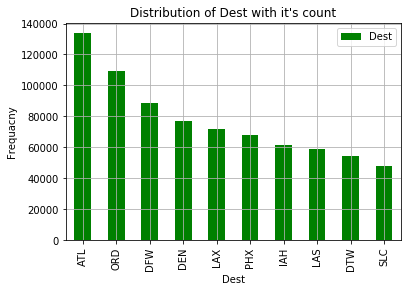

In [130]:
plot_data_with_freq('Dest',None)

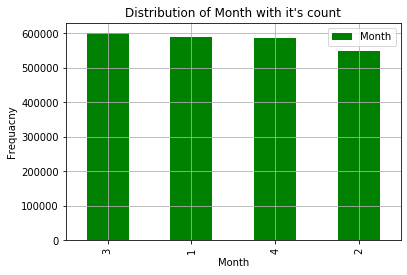

In [131]:
plot_data_with_freq('Month',None)

> 6. What are the most successful flights in terms of distance

### Answer 337 miles

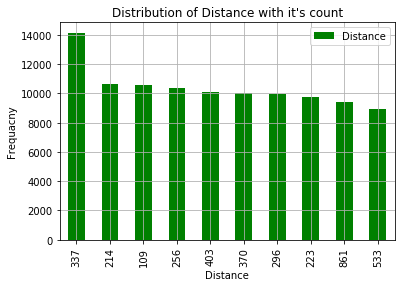

In [132]:
plot_data_with_freq('Distance',None)

> 5. What are the cities that receive the most successful flights?

### Answer : Chicago and Atlanta

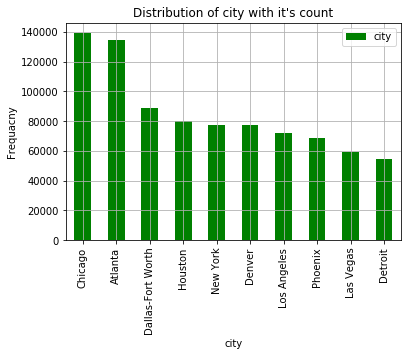

In [133]:
plot_data_with_freq('city',None)

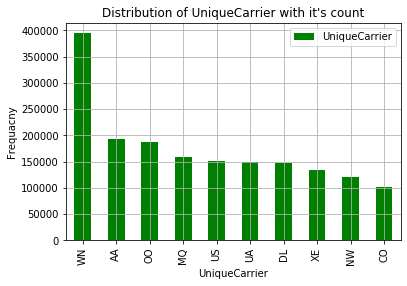

In [134]:
plot_data_with_freq('UniqueCarrier',None)

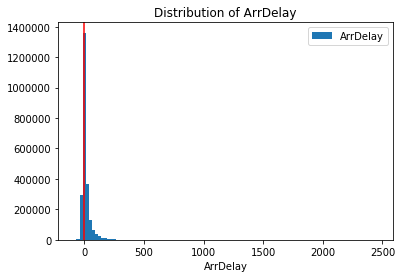

In [135]:
plt.hist(flights['ArrDelay'],bins=100,label='ArrDelay')
plt.axvline(x=0, color='r')
plt.xlabel('ArrDelay')
plt.title("Distribution of ArrDelay")
plt.legend()

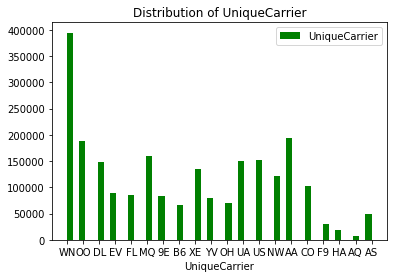

In [136]:
plt.hist(flights['UniqueCarrier'],bins=50,label='UniqueCarrier',color='green')
plt.xlabel('UniqueCarrier')
plt.title("Distribution of UniqueCarrier")
plt.legend()

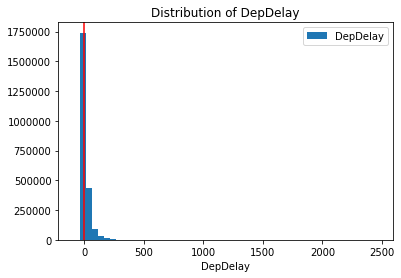

In [137]:
plt.hist(flights['DepDelay'],bins=50,label='DepDelay')
plt.axvline(x=0, color='r')
plt.xlabel('DepDelay')
plt.title("Distribution of DepDelay")
plt.legend()

From the above, we can conclude the following.

> Most of the flights are heading to ATL Airport, followed by ORD Airport.

> The number of flights is approximately equal throughout the four months.

> Most of the flights traveled 337 miles.

> Most of the flights are in Chicago and Atlanta and the difference between them is not great.

> By studying the late time, we can see that the number of flights that took off or landed earlier than their original return is very small compared to the late flights.

## Diverted Flights

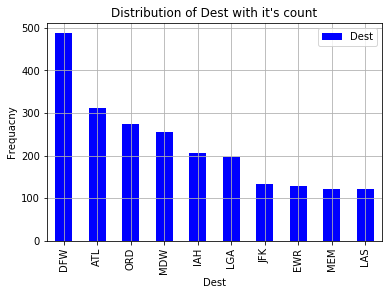

In [138]:
plot_data_with_freq('Dest','diverted')

> 3. Which month is the most diverted flights ?

### Answer : 2

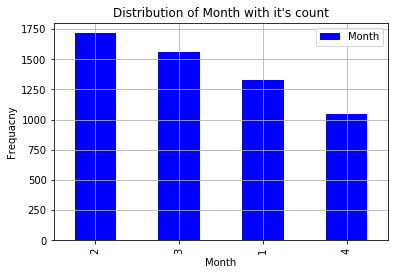

In [139]:
plot_data_with_freq('Month','diverted')

> 7. What are the most diverted flights in terms of distance ?

### Answer : 239 miles

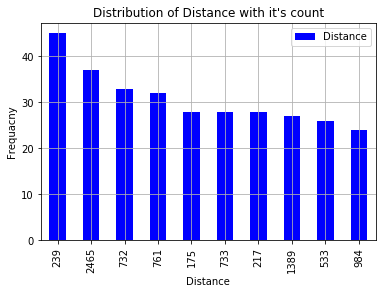

In [140]:
plot_data_with_freq('Distance','diverted')

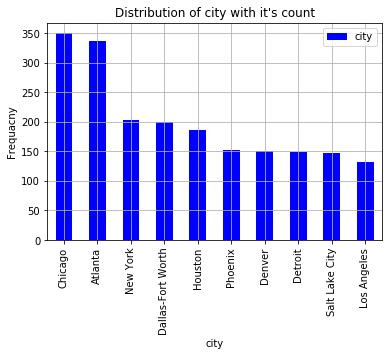

In [141]:
plot_data_with_freq('city','diverted')

From the above, we can conclude the following.

> Most of the diverted flights went to DFW airport, followed by ATL with a difference of about 250 flights.

> The number of diverting flights is high in 2 month, mostly due to weather conditions.

> Most of the diverted flights traveled 239 miles.

> Most of the diverted flights are in Chicago and Atlanta, and the difference between them is minimal.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> One of the important distributions is the delay, whether take off or landing
It is possible to see the distributions from the zero line, that some flights took off or landed early, but most of them were delayed, and this could support the idea of delayed flights during January and February because they are winter seasons

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There are nun value in many columns so I chose some important features to work on.
I also noticed that the flight distances are very long, but I made sure of their validity. Then I searched for it on the Internet

> https://www.airportdistancecalculator.com/

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Now i will draw each variable with the others
i have made a choice "ArrDelay","Distance","DepDelay",'ActualElapsedTime','Dest','Month'

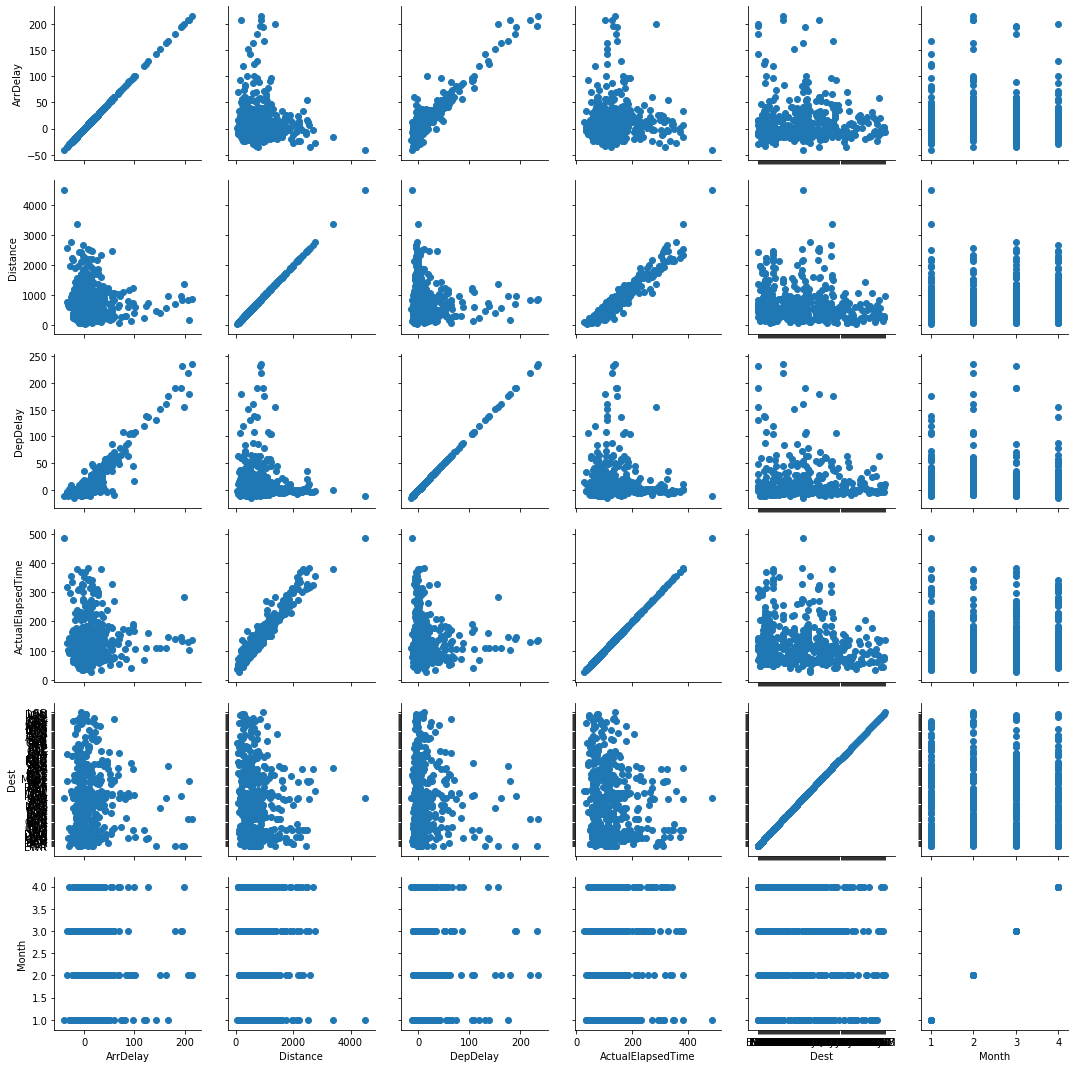

In [142]:
features = ["ArrDelay","Distance","DepDelay",'ActualElapsedTime','Dest','Month']

samples = np.random.choice(flights.shape[0], 500, replace=False)
flights_sample = flights.iloc[samples,:]

g = sb.PairGrid(data=flights_sample, vars=features)

g.map(plt.scatter);

In [143]:
#This function plot a given scatter plot and mark the 0 value and other given point

def plot_data(x_axis,y_axis,d):
    plt.scatter(flights[x_axis],flights[y_axis],s=1)
    if d != None :
        plt.axvline(x=0, color='r')
        plt.axvline(x=d, color='r')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.grid(True)    
    

Text(0.5, 1.0, 'The relation between arr_delay and flight distance')

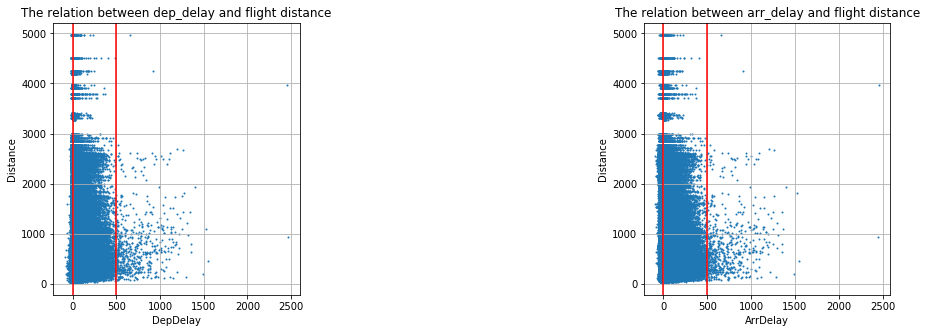

In [144]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plot_data('DepDelay','Distance',500)
plt.title('The relation between dep_delay and flight distance')
plt.subplot(1,3,3)
plot_data('ArrDelay','Distance',500)
plt.title('The relation between arr_delay and flight distance')

Here you display the time delay with the distance traveled
 
> We can see the distribution of points where they are concentrated to 500 and then gradually decrease, and this is present for both graphs.
It can also be seen that most of the delayed flights are bad take off or landing within the 3000 range

Now I will calculate the mean delay, whether take off "ArrDelay" or landing "DepDelay", for each month

In [145]:
delay_dep = []
delay_arr = []
month = []

for i in range(12):
    month_num = flights[flights['Month'] == i+1]
    delay_arr_mean = month_num['ArrDelay'].mean()
    delay_dep_mean = month_num['DepDelay'].mean()
    month.append(i+1)
    delay_arr.append(delay_arr_mean)
    delay_dep.append(delay_dep_mean)    

The relation between months and the mean value of dep_delay and arr_delay, which show the rate of flights delay in months

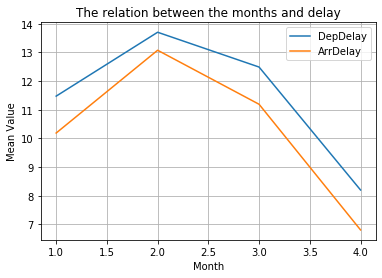

In [146]:
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.plot(month,delay_dep,label='DepDelay')
plt.plot(month,delay_arr,label='ArrDelay')
plt.title('The relation between the months and delay')
plt.legend()
plt.grid(True)

As seen in the figure, it can be seen that the average delay increases from January to February and then tends to decrease until April, and this supports what was presented in the previous section.
It can be seen that the average landing delay is higher than the take-off delay, and this also supports what was presented previously.
It can be said that the reason for this is the weather conditions during the months of January and February

Here the delay issue has taken on a little deeper.
Here I added the ArrDelay and DepDelay then research the relationship of this result with other features

In [147]:
DepDelay = flights['DepDelay'].tolist()
ArrDelay = flights['ArrDelay'].tolist()
total_delay = []
for i in range(len(ArrDelay)):
    total_delay.append(ArrDelay[i] + DepDelay[i])
flights['TotalDelay'] = total_delay

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [148]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

https://stackoverflow.com/questions/37470734/matplotlib-giving-error-overflowerror-in-draw-path-exceeded-cell-block-limit

Text(0.5, 1.0, 'The relation between the total delay and the flight distance')

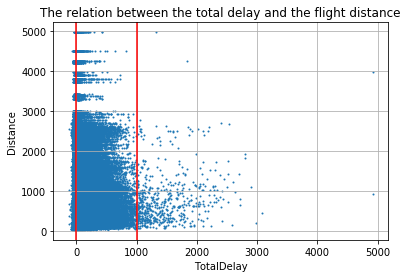

In [149]:
plot_data('TotalDelay','Distance',1000)
plt.title('The relation between the total delay and the flight distance')

Text(0.5, 1.0, 'The relation between the total delay and the actual time of flights')

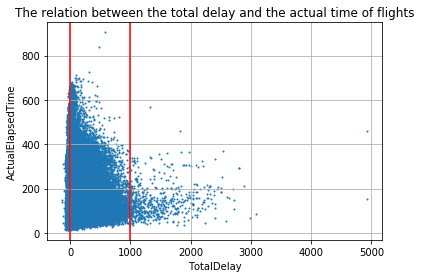

In [150]:
plot_data('TotalDelay','ActualElapsedTime',1000)
plt.title('The relation between the total delay and the actual time of flights')

As can be seen from the two opposite figures, it can be seen that the data is concentrated up to 1000, and this supports what was presented in the previous section, which is that the data for the take-off and landing delays are concentrated to 500

Text(0.5, 1.0, 'The relation between the flight distance and the actual time of flights')

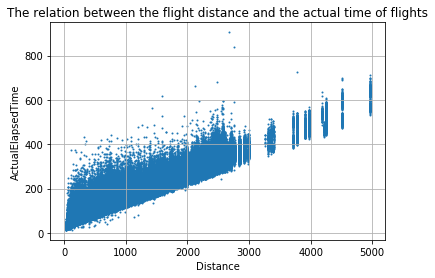

In [151]:
plot_data('Distance','ActualElapsedTime',None)
plt.title('The relation between the flight distance and the actual time of flights')

It is expected that the results will achieve the line equation, as the greater the distance, the greater the flight time.
Some points outside the line path can be observed.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From previous relationships, I can say that the distance does not affect the time delay, whether take off or landing.
The idea of canceling or diverting flights during the months of January and February was also supported by calculating the mean delay during each month

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most of the relationships between the variables were highly anticipated by studying them in the previous section

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### In this part, we will evaluate the time of departure and arrival to the morning and evening, in order to establish a relationship based on other variables.

In [152]:
import datetime

https://stackoverflow.com/questions/38555327/extract-hours-and-minutes-from-string-python

We'll work on diverted flights

In [153]:
flight_diverted.shape

(5654, 25)

In [154]:
flight_diverted.index = list(range(flight_diverted.shape[0]))

am = list(range(12)) #All morning hours
am_pm = []
for i in range(flight_diverted.shape[0]):
    #print(i)
    dep_time = int(flight_diverted.loc[i][6])

    if dep_time == 2400 : # 12 AM 
        dep_time = '00'
    
    if len(str(dep_time))<2: # For cells that contains only integer number
        dep_time = str(dep_time*100)
        time = datetime.datetime.strptime(str(dep_time),'%H%M')
    else:
        time = datetime.datetime.strptime(str(dep_time),'%H%M')
    if time.hour in am:
        am_pm.append('AM')
    else:
        am_pm.append('PM')
        
flight_diverted['AM_PM'] = am_pm

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [155]:
flight_diverted.columns.values

array(['Month', 'DayofMonth', 'Origin', 'Dest', 'Distance', 'Cancelled',
       'DepTime', 'AirTime', 'Diverted', 'DepDelay', 'ArrDelay',
       'ActualElapsedTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'UniqueCarrier', 'iata',
       'airport', 'city', 'state', 'country', 'lat', 'long', 'AM_PM'],
      dtype=object)

Now we will see the relationship between the flight time, the distance, and the departure time

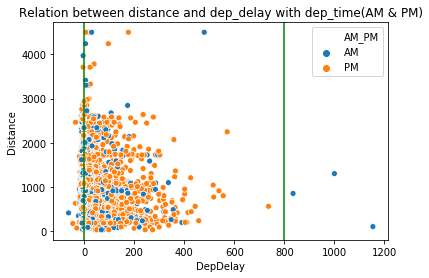

In [156]:
sb.scatterplot(flight_diverted.DepDelay, flight_diverted.Distance, hue=flight_diverted.AM_PM)
plt.title("Relation between distance and dep_delay with dep_time(AM & PM)")
plt.axvline(x=800,color='green');
plt.axvline(x=0,color='green');

It becomes clear to us that the number of diverted flights was more at night, and we can also see that the time of departure was longer at night, except for three morning flights only, the time of departure was much greater (above 800 min).

### Now we will review the departure and arrival time delays in the United States by using a heat map and also using the values of longitude and latitude

In [157]:
flights.describe()

,Month,DayofMonth,Distance,Cancelled,DepTime,AirTime,Diverted,DepDelay,ArrDelay,ActualElapsedTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,lat,long,TotalDelay
count,2.324775e+06,2.324775e+06,2.324775e+06,2324775.0,2.324775e+06,2.319121e+06,2.324775e+06,2.324775e+06,2.319121e+06,2.319121e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000,2.324775e+06,2.324775e+06,2.319121e+06
mean,2.510584e+00,1.569343e+01,7.302138e+02,0.0,1.340018e+03,1.051016e+02,2.432063e-03,1.143636e+01,1.027357e+01,1.286189e+02,15.752957,2.938243,16.158462,0.080459,20.976710,3.672593e+01,-9.515951e+01,2.166273e+01
std,1.123297e+00,8.745015e+00,5.593608e+02,0.0,4.802717e+02,6.766801e+01,4.925596e-02,3.653229e+01,3.963429e+01,7.025303e+01,40.035487,19.166662,30.534167,1.742579,38.617154,5.708534e+00,1.794696e+01,7.478733e+01
min,1.000000e+00,1.000000e+00,2.400000e+01,0.0,1.000000e+00,0.000000e+00,0.000000e+00,-9.200000e+01,-9.100000e+01,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.770189e+01,-1.766460e+02,-1.320000e+02
25%,1.000000e+00,8.000000e+00,3.280000e+02,0.0,9.300000e+02,5.600000e+01,0.000000e+00,-4.000000e+00,-9.000000e+00,7.800000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,3.343417e+01,-1.119778e+02,-1.200000e+01
50%,3.000000e+00,1.600000e+01,5.850000e+02,0.0,1.330000e+03,8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.110000e+02,0.000000,0.000000,5.000000,0.000000,0.000000,3.736186e+01,-8.997667e+01,-1.000000e+00
75%,4.000000e+00,2.300000e+01,9.640000e+02,0.0,1.733000e+03,1.340000e+02,0.000000e+00,1.100000e+01,1.500000e+01,1.600000e+02,16.000000,0.000000,20.000000,0.000000,27.000000,4.077724e+01,-8.168786e+01,2.400000e+01
max,4.000000e+00,3.100000e+01,4.962000e+03,0.0,2.400000e+03,8.860000e+02,1.000000e+00,2.467000e+03,2.461000e+03,9.050000e+02,2436.000000,1148.000000,1357.000000,392.000000,1254.000000,7.128545e+01,-6.479856e+01,4.920000e+03


https://github.com/asajm/communicate-data-findings/blob/master/exploration.ipynb

#### At first we will take a sample from the successful flights and show the color distribution on heat map


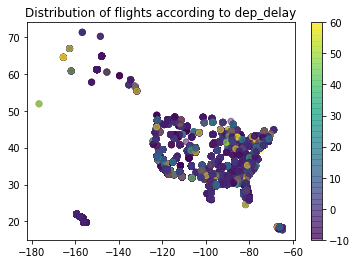

In [158]:
def depdelay_color(x):
    v_max, v_min = 60, -10
    if(x>v_max): 
        x=v_max
    elif(x<v_min):
        x=v_min
    return x

sample = flights.sample(100000)
sample['DepDelay'] = sample['DepDelay'].apply(depdelay_color)

plt.scatter(x=sample['long'], y=sample['lat'], alpha=.5, c=sample['DepDelay'])
plt.title("Distribution of flights according to dep_delay")

plt.colorbar();

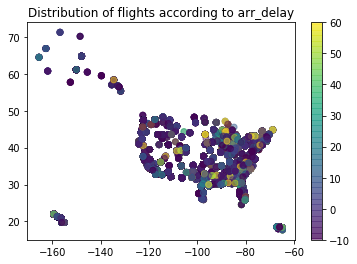

In [159]:
def arrdelay_color(x):
    v_max, v_min = 60, -10
    if(x>v_max): 
        x=v_max
    elif(x<v_min):
        x=v_min
    return x

sample = flights.sample(100000)
sample['ArrDelay'] = sample['ArrDelay'].apply(arrdelay_color)

plt.scatter(x=sample['long'], y=sample['lat'], alpha=.5, c=sample['ArrDelay'])
plt.title("Distribution of flights according to arr_delay")
plt.colorbar();

### In the same way we will display the flight time

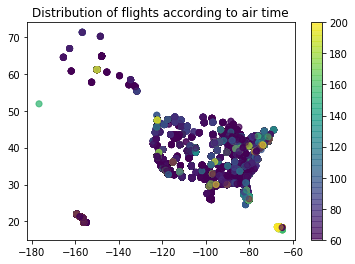

In [160]:
def air_time_color(x):
    v_max, v_min = 200, 60
    if(x>v_max): 
        x=v_max
    elif(x<v_min):
        x=v_min
    return x

sample = flights.sample(100000)
sample['AirTime'] = sample['AirTime'].apply(air_time_color)

plt.scatter(x=sample['long'], y=sample['lat'], alpha=.5, c=sample['AirTime'])
plt.title("Distribution of flights according to air time")
plt.colorbar();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I researched a little deeper into the problem of delay and calculated the total delay and compared it to the flight time and also the distance, I found an approximate stability in each of the two graphs.
It was expected that the relationship between distance and flight time was a straight line.

### Were there any interesting or surprising interactions between features?

> There were no exciting interactions because I expected these results in the previous sections, but here I confirmed the results and ideas that I presented previously.

## Conclusions

> In the beginning, I selected some important features to work on, and then I divided the data into three important sections, which are the canceled and successful flights and the transferred flights. Then I did some unilateral relationships between some variables and answered some questions and constructed some ideas, and then I carefully examined the features and their relationship with each other and made a conclusion and was supportive of some ideas that I imposed in the first section, and then I made triple relations to make sure of all the ideas .
There were many problems, including the presence of NAN values in many important columns that might help a more accurate analysis of the delay problem.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!